In [1]:
#magic function para imprimir imagens no notebook
%matplotlib inline
#importa biblioteca para utilizacao de graficos
import matplotlib.pyplot as plt
#importa bilbioteca para manipulação de dados
import numpy as np

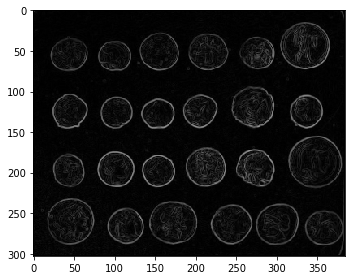

In [16]:
from skimage import data, io, filters

image = data.coins()
# ... or any other NumPy array!
edges = filters.sobel(image)
io.imshow(edges)
io.show()

In [2]:
#ETAPA 1 - HISTOGRAMA E FILTRO DE BORDAS
from skimage import filters, data, img_as_ubyte
from skimage.data import camera
from skimage.util import compare_images
from skimage.exposure import histogram

#recupera imagem da camera, presente no Skimage
camera = camera()
#calcula bordas utilizando o filtro de sobel
edge_sobel = filters.sobel(camera)

#calcula histograma da imagem
hist, centers = histogram(camera)


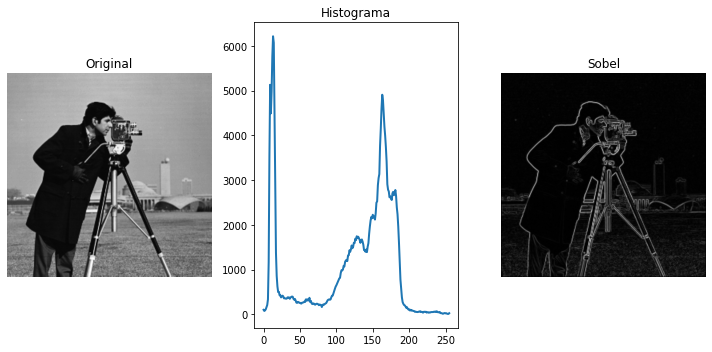

In [3]:
#imprime imagens
fig, axes = plt.subplots(ncols=3, figsize=(10, 5))
axes[0].imshow(camera, cmap=plt.cm.gray)
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].plot(centers, hist, lw=2)
axes[1].set_title('Histograma')
axes[2].imshow(edge_sobel, cmap=plt.cm.gray)
axes[2].set_title('Sobel')
axes[2].axis('off')
plt.tight_layout()
plt.show()


In [17]:
#ETAPA 2 - Remoção de ruídos
#importa filtro mediana
from skimage.filters.rank import median
from skimage.morphology import disk

#adiciona ruído artificial
#cria uma matriz com números aleatórios entre 0 e 1 com o mesmo tamanho da imagem
noise = np.random.random(camera.shape)
camera_ruido = img_as_ubyte(data.camera())
#Cria ruído do tipo sal e pimenta. Caso o número aleatório naquela posição seja maior que 0.75, muda o valor do pixel da imagem original para 255. Caso seja menor que 0.25, muda pra 0.
camera_ruido[noise > 0.95] = 255
camera_ruido[noise < 0.25] = 0

#aplica filtro de mediana, com um filtro circular de raio igual a 1
ruido_tratado = median(camera_ruido, disk(5))


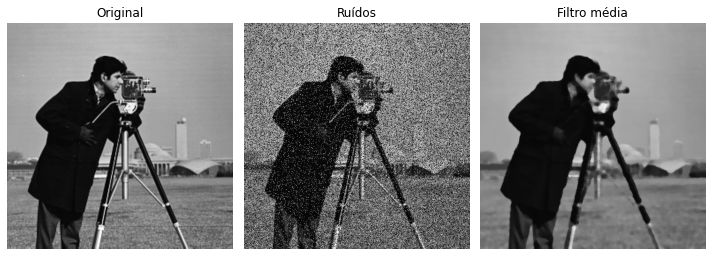

In [19]:
#exibe imagens
fig, axes = plt.subplots(ncols=3, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(camera, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[1].imshow(camera_ruido, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Ruídos')
#disk é um filtro circular
ax[2].imshow(ruido_tratado, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('Filtro média')
for a in ax:
    a.axis('off')
plt.tight_layout()


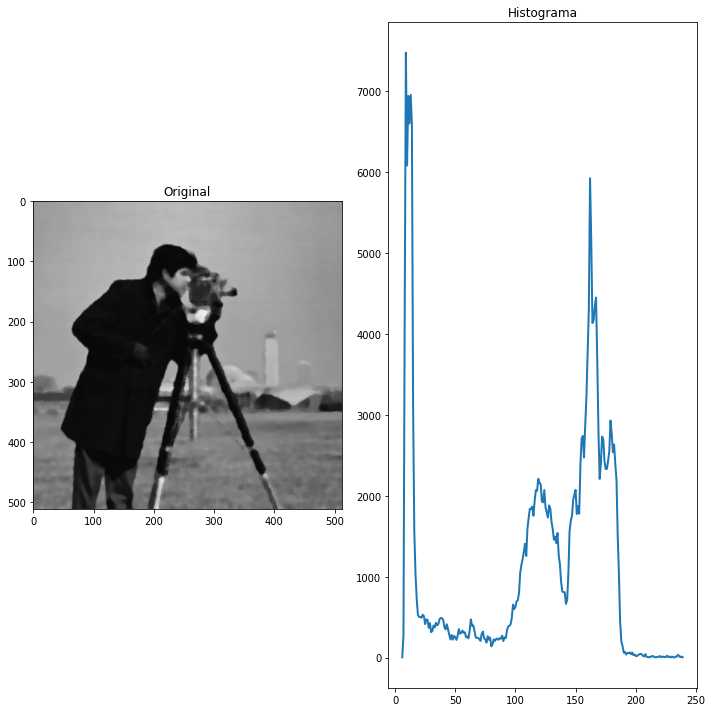

In [20]:
## IMPRESSAO DE HISTOGRAMA
ruido_tratado1 = median(camera_ruido, disk(5))
hist1, centers1 = histogram(img_as_ubyte(ruido_tratado1))

ruido_tratado2 = median(camera_ruido, disk(200))
hist2, centers2 = histogram(img_as_ubyte(ruido_tratado2))

ruido_tratado3 = median(camera_ruido, disk(500))
hist3, centers3 = histogram(img_as_ubyte(ruido_tratado3))


fig, axes = plt.subplots(ncols=2, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(ruido_tratado1, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Original')
axes[1].plot(centers1, hist1, lw=2)
axes[1].set_title('Histograma')
plt.tight_layout()


In [22]:
#ETAPA 3
from skimage import io, color
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
from skimage.morphology import dilation, square, erosion
#importa scipy, biblioteca muito utilizada para manipulação de dados e estatística
from scipy import ndimage as ndi
from skimage.feature import canny

#Obtém a imagem de um gato
gato = data.chelsea()
#Transforma a imagem para tom de cinza
gato_gray = color.rgb2gray(gato)

#Imprime a imagem original do gato e sua representação em tom de cinza. Perceba que a imagem colorida possui 3 canais
print(gato.shape, gato_gray.shape)

(300, 451, 3) (300, 451)


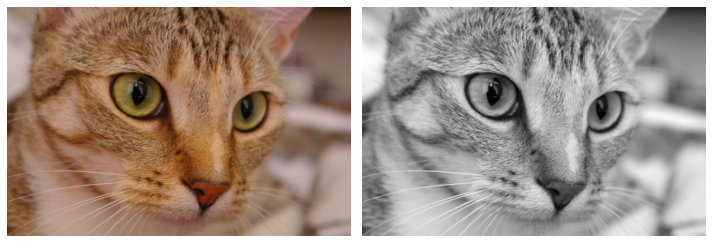

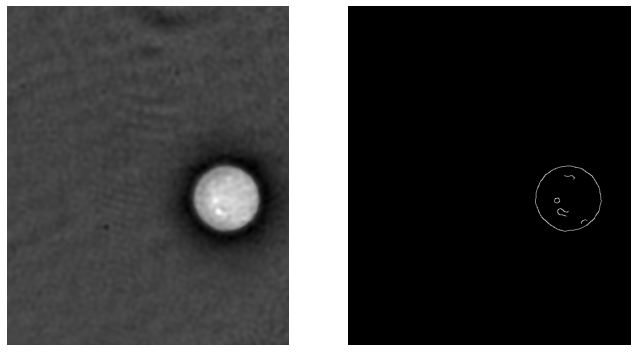

In [7]:
#imprime imagens
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].imshow(gato, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].imshow(gato_gray, cmap=plt.cm.gray)
axes[1].axis('off')
plt.tight_layout()
plt.show()

#Obtém a imagem de uma célula
celula = data.cell()
#Realiza a detecção de obrdas nessa imagem, utilizando o filtro de canny. 
#Esse filtro deve ser aplicado em uma imagem em tom de cinza.
bordas = canny(celula)

#imprime imagens
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].imshow(celula, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].imshow(bordas, cmap=plt.cm.gray)
axes[1].axis('off')
plt.tight_layout()
plt.show()


In [8]:
#Realiza a diltação da imagem, operação que aumenta as regiões brancas em uma imagem binarizada.
dilatacao = dilation(bordas, square(5))

In [9]:
#Realiza a erosão da imagem, operação que aumenta as regiões pretas em uma imagem binarizada.
erosao = erosion(dilatacao, square(5))

In [10]:
#Preenche as regiões demarcadas na imagem, a partir da imagem dilatada, obtendo uma imagem segmentada
regioes = ndi.binary_fill_holes(dilatacao)

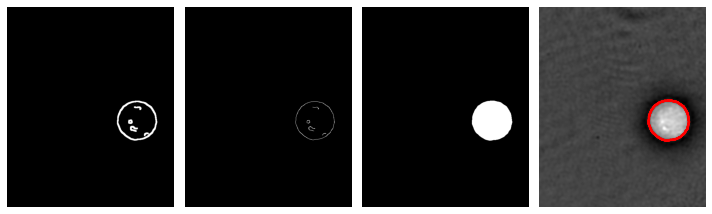

In [11]:
#imprime imagens
fig, axes = plt.subplots(ncols=4, figsize=(10, 5))
axes[0].imshow(dilatacao, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].imshow(erosao, cmap=plt.cm.gray)
axes[1].axis('off')
axes[2].imshow(regioes, cmap=plt.cm.gray)
axes[2].axis('off')
axes[3].imshow(celula, cmap=plt.cm.gray)
#Adiciona contorno na imagem original a partir do que está identificado na imagem segmentada
axes[3].contour(regioes, linewidths=2, colors='red')
axes[3].axis('off')
plt.tight_layout()
plt.show()


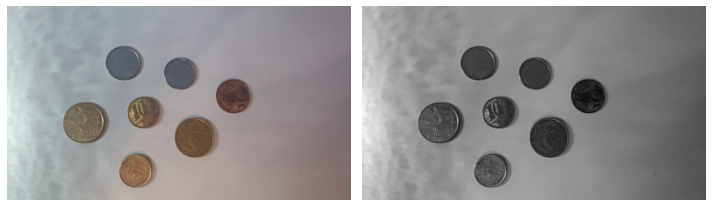

In [38]:
moedas = io.imread('https://i.ibb.co/hVxB5Mx/moedas.jpg')
moedas_gray = color.rgb2gray(moedas)

#imprime imagens
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].imshow(moedas, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].imshow(moedas_gray, cmap=plt.cm.gray)
axes[1].axis('off')
plt.tight_layout()
plt.show()

(360, 640, 3) (360, 640)


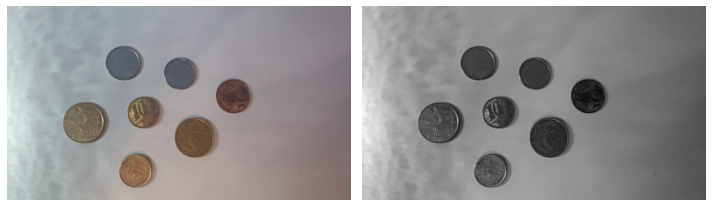

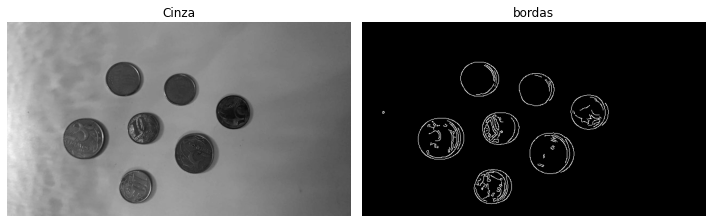

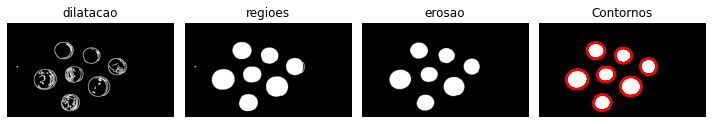

In [40]:
#Imprime a imagem original do gato e sua representação em tom de cinza. Perceba que a imagem colorida possui 3 canais
print(moedas.shape, moedas_gray.shape)

#imprime imagens
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].imshow(moedas, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].imshow(moedas_gray, cmap=plt.cm.gray)
axes[1].axis('off')
plt.tight_layout()
plt.show()

#Obtém a imagem de uma célula
celula = moedas_gray
#Realiza a detecção de bordas nessa imagem, utilizando o filtro de canny. 
#Esse filtro deve ser aplicado em uma imagem em tom de cinza.
bordas = canny(moedas_gray)

#imprime imagens
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].imshow(celula, cmap=plt.cm.gray)
axes[0].axis('off')
axes[0].set_title('Cinza')
axes[1].imshow(bordas, cmap=plt.cm.gray)
axes[1].axis('off')
axes[1].set_title('bordas')
plt.tight_layout()
plt.show()

#Realiza a dilatação da imagem, operação que aumenta as regiões brancas em uma imagem binarizada.
dilatacao = dilation(bordas, square(2))

#Preenche as regiões demarcadas na imagem, a partir da imagem dilatada, obtendo uma imagem segmentada
regioes = ndi.binary_fill_holes(dilatacao)

#Realiza a erosão da imagem, operação que aumenta as regiões pretas em uma imagem binarizada.
erosao = erosion(regioes, square(5))


#imprime imagens
fig, axes = plt.subplots(ncols=4, figsize=(10, 5))
axes[0].imshow(dilatacao, cmap=plt.cm.gray)
axes[0].axis('off')
axes[0].set_title('dilatacao')
axes[1].imshow(regioes, cmap=plt.cm.gray)
axes[1].axis('off')
axes[1].set_title('regioes')
axes[2].imshow(erosao, cmap=plt.cm.gray)
axes[2].axis('off')
axes[2].set_title('erosao')
axes[3].imshow(regioes2, cmap=plt.cm.gray)
#Adiciona contorno na imagem original a partir do que está identificado na imagem segmentada
axes[3].contour(regioes2, linewidths=2, colors='red')
axes[3].axis('off')
axes[3].set_title('Contornos')
plt.tight_layout()
plt.show()

(360, 640, 3) (640, 397)


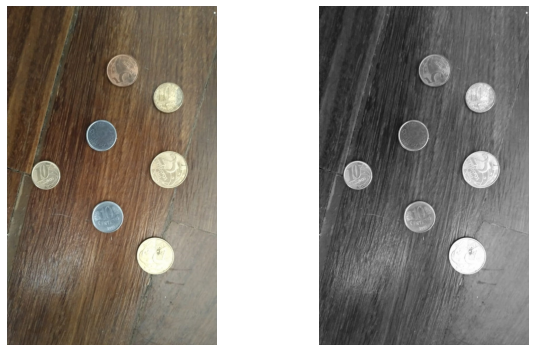

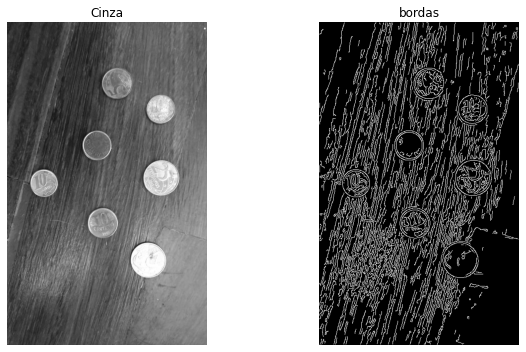

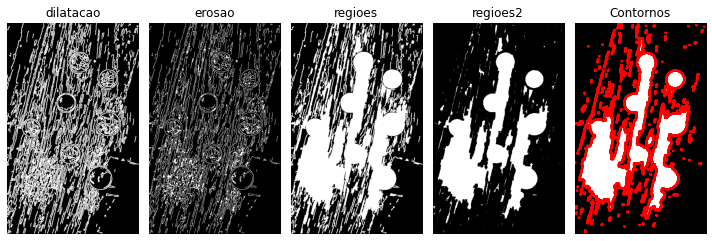

In [41]:
moedas2 = io.imread('https://i.ibb.co/Qnm9HhG/moedas2.jpg')
moedas_gray2 = color.rgb2gray(moedas2)


#Imprime a imagem original do gato e sua representação em tom de cinza. Perceba que a imagem colorida possui 3 canais
print(moedas.shape, moedas_gray2.shape)

#imprime imagens
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].imshow(moedas2, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].imshow(moedas_gray2, cmap=plt.cm.gray)
axes[1].axis('off')
plt.tight_layout()
plt.show()

#Obtém a imagem de uma célula
celula = moedas_gray2
#Realiza a detecção de bordas nessa imagem, utilizando o filtro de canny. 
#Esse filtro deve ser aplicado em uma imagem em tom de cinza.
bordas = canny(moedas_gray2)

#imprime imagens
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].imshow(celula, cmap=plt.cm.gray)
axes[0].axis('off')
axes[0].set_title('Cinza')
axes[1].imshow(bordas, cmap=plt.cm.gray)
axes[1].axis('off')
axes[1].set_title('bordas')
plt.tight_layout()
plt.show()

#Realiza a dilatação da imagem, operação que aumenta as regiões brancas em uma imagem binarizada.
dilatacao = dilation(bordas, square(2))

#Realiza a erosão da imagem, operação que aumenta as regiões pretas em uma imagem binarizada.
erosao = erosion(dilatacao, square(2))

#Preenche as regiões demarcadas na imagem, a partir da imagem dilatada, obtendo uma imagem segmentada
regioes = ndi.binary_fill_holes(dilatacao)

#Realiza a erosão da imagem, operação que aumenta as regiões pretas em uma imagem binarizada.
regioes2 = erosion(regioes, square(5))


#imprime imagens
fig, axes = plt.subplots(ncols=5, figsize=(10, 5))
axes[0].imshow(dilatacao, cmap=plt.cm.gray)
axes[0].axis('off')
axes[0].set_title('dilatacao')
axes[1].imshow(erosao, cmap=plt.cm.gray)
axes[1].axis('off')
axes[1].set_title('erosao')
axes[2].imshow(regioes, cmap=plt.cm.gray)
axes[2].axis('off')
axes[2].set_title('regioes')
axes[3].imshow(regioes2, cmap=plt.cm.gray)
axes[3].axis('off')
axes[3].set_title('regioes2')
axes[4].imshow(regioes2, cmap=plt.cm.gray)
#Adiciona contorno na imagem original a partir do que está identificado na imagem segmentada
axes[4].contour(regioes2, linewidths=2, colors='red')
axes[4].axis('off')
axes[4].set_title('Contornos')
plt.tight_layout()
plt.show()